<a href="https://colab.research.google.com/github/channacy/mental_health_risk_predictor/blob/main/KWK_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# importing packages 
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression


In [23]:
url = 'https://raw.githubusercontent.com/channacy/mental_health_US/main/Mental%20Health%20and%20GDP%20-%20Sheet1-6.csv'
data = pd.read_csv(url)
data.head()
data.describe()
#percent_gdp is percantage of the nation's gdp 

,One_Severe_Depressive,Severe_Depressive,sub_disorder,GDP,percent_gdp,gdp_growth_percent
count,50.000000,50.000000,50.000000,5.000000e+01,50.0000,50.00000
mean,14.281600,10.126000,4.040000,4.181460e+05,1.9760,2.14800
std,1.432016,1.834678,0.573706,5.418648e+05,2.5597,1.14611
min,11.400000,6.300000,3.160000,3.327800e+04,0.2000,-0.30000
25%,13.177500,9.000000,3.630000,9.259375e+04,0.4250,1.40000
50%,14.260000,9.800000,4.005000,2.450250e+05,1.2000,2.05000
75%,15.105000,11.675000,4.362500,5.496965e+05,2.5750,2.77500
max,17.570000,13.500000,5.610000,3.120386e+06,14.7000,5.70000


In [24]:
#Average Percentage of Youth Suffering from A Depressive Episode
print("In 2019, there were about 21 million young people aged 15-19 in America. Assuming the number of youth did not increase or decrease..")

print("The average state percentage of youth suffering from at least one severe depressive episode in the past year is " + str(data["One_Severe_Depressive"].mean()) + "%")
print("This is equivalent to " + str((data["One_Severe_Depressive"].mean())*21000000/100) + " young people for each state.")
print("The average state percantage of youth suffering from a severe depressive episode in 2021 is " + str(data['Severe_Depressive'].mean())+ "%")
print("This is equivalent to " + str((data['Severe_Depressive'].mean()*21000000)/100) + " young people for each state.")



In 2019, there were about 21 million young people aged 15-19 in America. Assuming the number of youth did not increase or decrease..
The average state percentage of youth suffering from at least one severe depressive episode in the past year is 14.2816%
This is equivalent to 2999136.0 young people for each state.
The average state percantage of youth suffering from a severe depressive episode in 2021 is 10.126%
This is equivalent to 2126460.0 young people for each state.


In [25]:
#Average Percantage of Youth Suffering from Substance Abuse
print("The average state percentage of youth suffering from substance abuse in the past year is " + str(data["sub_disorder"].mean()) + "%")
print("This is equivalent to " + str((data["sub_disorder"].mean())*21000000/100) + " young people for each state.")



The average state percentage of youth suffering from substance abuse in the past year is 4.04%
This is equivalent to 848400.0 young people for each state.


In [26]:
#Finding Covarriance Using Pandas
data.cov()
#There is a negative coefficient between the variables: percentage of youth who experienced at least one severe depressive episode, percantage of those who experience a severe depressive episode in 2021, and those who had suffer from substance abuse in the past year, and the other variable, the GDP of each state. 
print("Using the Covarriance Matrix to find a covarriance, there is a negative coefficient between the variables: percentage of youth who experienced at least one severe depressive episode, percantage of those who experience a severe depressive episode in 2021, and those who had suffer from substance abuse in the past year, and the other variable, the GDP of each state.")
print("In other words, as GDP or the percantage of the state's GDP relative to the national's GDP, decreases as the rate at which youth struggle with depressive episodes and substance abuse increases.")

Using the Covarriance Matrix to find a covarriance, there is a negative coefficient between the variables: percentage of youth who experienced at least one severe depressive episode, percantage of those who experience a severe depressive episode in 2021, and those who had suffer from substance abuse in the past year, and the other variable, the GDP of each state.
In other words, as GDP or the percantage of the state's GDP relative to the national's GDP, decreases as the rate at which youth struggle with depressive episodes and substance abuse increases.


Using Seaborn to visualize a heatmap and the correlation coefficient matrix, the coefficient, r is negative between the state's GDP / GDP growth rate from 2018 and youth suffering from substance abuse or severe depressive episodes. Futhermore, r is positive between the percantage of youth who suffered from substance abuse and severe depressive episodes.


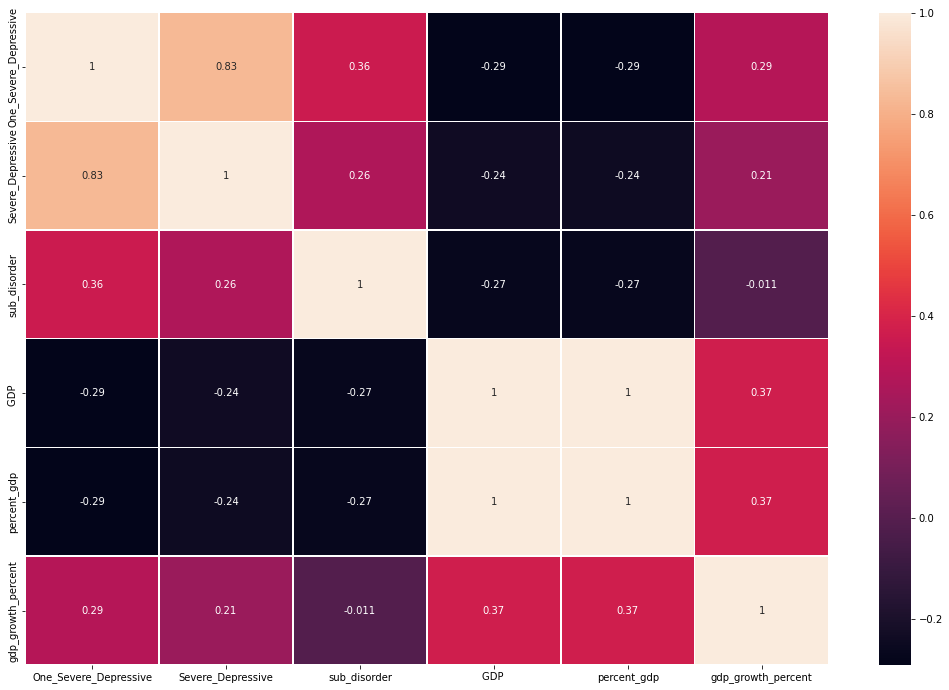

In [27]:
#Finding Correlation Coefficient
data.corr()
# set the figure size 
plt.subplots(figsize=(18, 12))

# create var for matrix 
corr = data.corr()

# plot the cor matrix 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5,annot=True)

#change the color palette
sns.color_palette("coolwarm", as_cmap=True)

print("Using Seaborn to visualize a heatmap and the correlation coefficient matrix, the coefficient, r is negative between the state's GDP / GDP growth rate from 2018 and youth suffering from substance abuse or severe depressive episodes. Futhermore, r is positive between the percantage of youth who suffered from substance abuse and severe depressive episodes.")

In [28]:
#Percentiles...50%
np.quantile(data["percent_gdp"], 0.5)


1.2

In [29]:
#....25%
np.quantile(data["percent_gdp"], 0.25)
# print("Using quantiles, 75% of U.S. states has a higher percentage than .425% of the national GDP and 25% of states with lower than .425% of the national GDP.")



0.42500000000000004

In [30]:
#...75%
np.quantile(data["percent_gdp"], 0.75)
# print("Using quantiles, 75% of U.S. states has a lower percentage than 2.575% of the national GDP and 25% of states with higher than 2.575 of the national GDP.")


2.575

(0.0, 15.0)

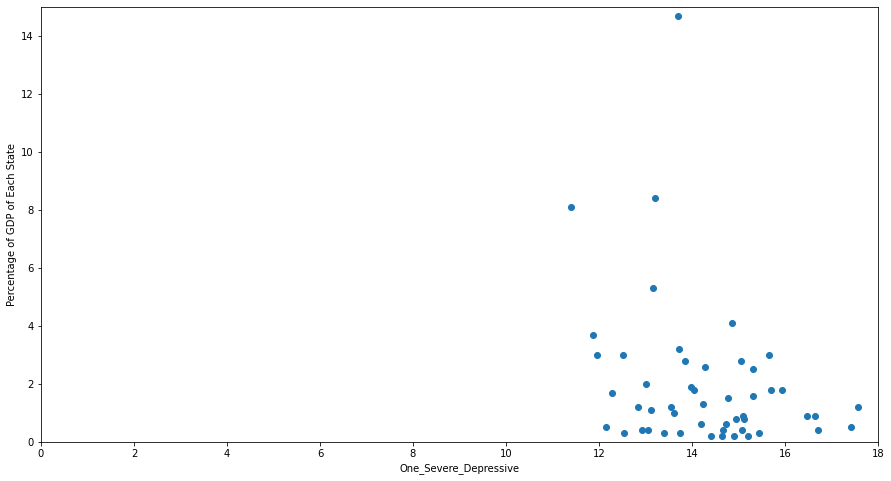

In [31]:
#for linear regression (to predict, )
# Set size of plot
plt.figure(figsize = (15, 8))

# Set X andY values to plot
plt.scatter(data['One_Severe_Depressive'], data["percent_gdp"])
# Set axis labels
plt.xlabel("One_Severe_Depressive")
plt.ylabel("Percentage of GDP of Each State")
# Set axis range
plt.xlim(0, 18 )
plt.ylim(0, 15 )

In [53]:
# Y dataset
Y = data[["sub_disorder"]]

# X dataset
X = data[["percent_gdp"]]

In [33]:
# instantiate our model 
sub_disorder_LR_model = LinearRegression()

In [34]:
# fit our model 
sub_disorder_LR_model.fit(X, Y)


LinearRegression()

In [35]:
# find the intercept
sub_disorder_LR_model.intercept_

array([4.15952586])

In [36]:
sub_disorder_LR_model.coef_

array([[-0.06048879]])

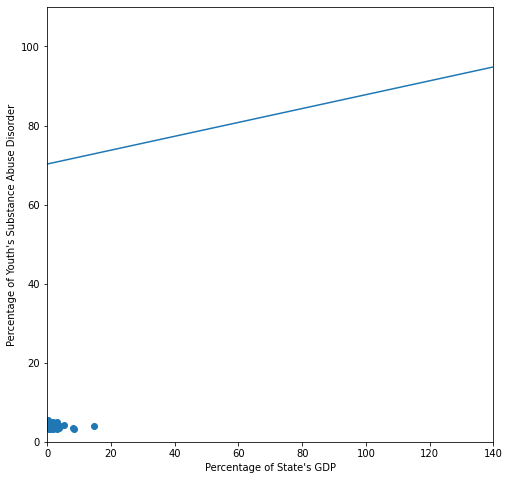

In [37]:
# Set size of plot
plt.figure(figsize=(8, 8))

# Plot our model output
x_plot = np.linspace(0, 140) 
y_plot = 0.17550916 * x_plot + 70.25449762
plt.plot(x_plot, y_plot)

# Plot our Observed Data
plt.scatter(data["percent_gdp"],data["sub_disorder"])
plt.xlabel("Percentage of State's GDP")
plt.ylabel("Percentage of Youth's Substance Abuse Disorder")
plt.xlim(0,140)
plt.ylim(0,110);

In [54]:
sub_disorder_LR_model.predict([[1.2]])
print("Using linear regression, if your state has 1.2% of the national GDP, then there is about a 4.090% chance, youth will face substance abuse disorder in his/her respective state.")

Using linear regression, if your state has 1.2% of the national GDP, then there is about a 4.090% chance, youth will face substance abuse disorder in his/her respective state.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [55]:
print(sub_disorder_LR_model.predict([[.425]]))
print("Using linear regression, if your state has .425 of the national GDP, then there is about a 4.134% chance, youth will face substance abuse disorder in his/her respective state.")

[[4.13381812]]
Using linear regression, if your state has .425 of the national GDP, then there is about a 4.134% chance, youth will face substance abuse disorder in his/her respective state.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [50]:
print(sub_disorder_LR_model.predict([[2.575]]))
print("Using linear regression, if your state has .425 of the national GDP, then there is about a chance, youth will face substance abuse disorder in his/her respective state.")

[[4.00376721]]
Using linear regression, if your state has .425 of the national GDP, then there is about a chance, youth will face substance abuse disorder in his/her respective state.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [45]:

print("However, the calculated R-squared is " + str(sub_disorder_LR_model.score(X, Y)) + " thus variations in the feature account for 7.3% of the variation in the target, the dependent variable, the state percentage of youth facing substance abuse in the past year.")

However, the calculated R-squared is 0.07283649260987768 thus variations in the feature account for 7.3% of the variation in the target, the dependent variable, the state percentage of youth facing substance abuse in the past year.
